In [1]:
#Fitting Brush model

import numpy as np
import matplotlib.pyplot as plt

import Brush as br
import Pacejka52 as pa
import Pacejka52_Sv_Sh_0 as pa52_0

Fz = 1500
mu = 0.8
lt = 0.2
kt = 360000
lam = 0.04

Sx = np.linspace(0,1,1000)
Sy = np.linspace(-0.3,0.3,1000)

params_Fx_init = [0.8, 360000, 0.04] # mu, kt, lamd
params_Fy_init = [0.8, 50000] # mu, Ca


TypeError: brush_lat() missing 1 required positional argument: 'lam'

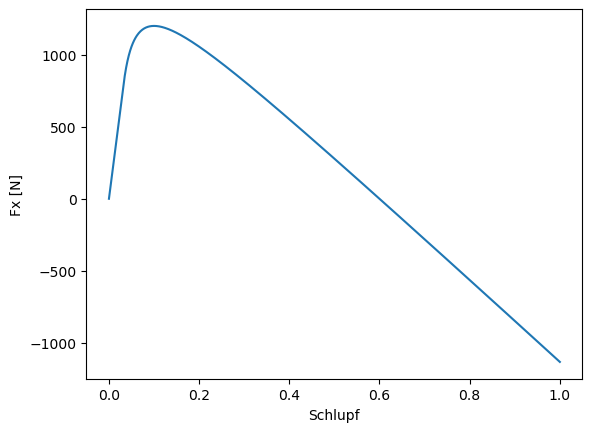

<Figure size 640x480 with 0 Axes>

In [2]:
#Plots init params

plt.figure(1)
Fx = br.brush_long(Sx,Fz, *params_Fx_init)
plt.plot(Sx,Fx)
plt.xlabel("Schlupf")
plt.ylabel("Fx [N]")

plt.figure(2)
Fy = br.brush_lat(Sy,Fz, * params_Fy_init)
plt.plot(Sy,Fy)
plt.xlabel("Schräglaufwinkel [rad]")
plt.ylabel("Fy [N]")

[1.70450966e+00 6.49454770e+05 4.19554033e-02]


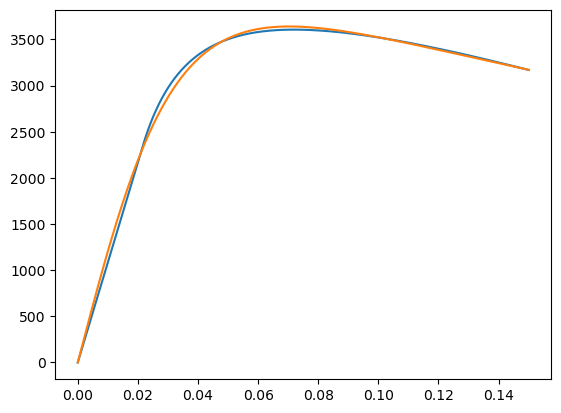

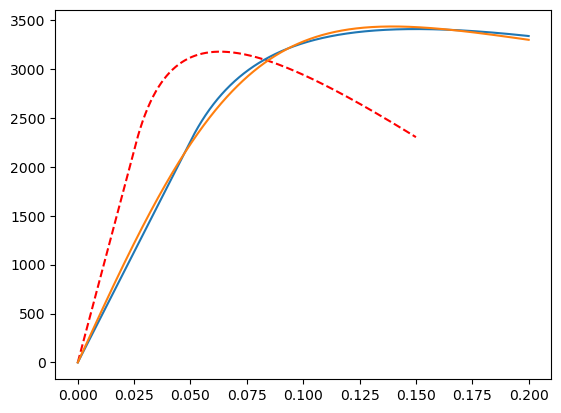

In [6]:
#Fitting
import scipy.optimize as opt
from scipy.optimize import curve_fit
#Pacejka 52
IA = 0
Fz0 = 3114
Fz = 2000

Sx = np.linspace(0,0.15,1000)
Sy = np.linspace(0,0.2,1000)
Sxx = np.linspace(0,0.15,1000)
Syy = np.linspace(0,0.2,1000)

params_Fx_init = [0.8, 36000, 0.04] # mu, kt, lamd
params_Fy_init = [1.5, 1.10061960e+05, 0.04] # mu, Ca

Fx_pa = pa52_0.Pacejka52_long(Fz,Sx,IA,Fz0)[0]
Fy_pa = pa52_0.Pacejka52_lat(Fz,Sy,IA,Fz0)[0]


def Fx_br_func(Sx,mu,kt,lam):
    return br.brush_long(Sx,Fz, mu, kt, lam)

def Fy_br_func(Sy, mu, kt, lam):
    return br.brush_lat(Sy ,Fz,mu,kt, lam)
    

Fx_br_params, _ = curve_fit(Fx_br_func, Sx, Fx_pa, params_Fx_init)
Fy_br_params, _ = curve_fit(Fy_br_func, Sy, Fy_pa, params_Fy_init)

Fx_br_fit = Fx_br_func(Sx,Fx_br_params[0],Fx_br_params[1],Fx_br_params[2])
Fy_br_fit = Fy_br_func(Sy,Fy_br_params[0],Fy_br_params[1],Fy_br_params[2])

plt.figure(1)
plt.plot(Sx,Fx_br_fit)
plt.plot(Sx,Fx_pa)

plt.figure(2)
print(Fy_br_params)
F = br.brush_long(Sxx,Fz, 1.589, 1.05121274e+06, 5.74790959e-02)
plt.plot(Sxx,F,'r--')
plt.plot(Sy,Fy_br_fit)
plt.plot(Sy,Fy_pa)


In [19]:
print(Fy_br_params)

[1.72507630e+00 1.17317449e+05]


[1.80315636e+00 1.67941678e+06 3.58024720e-02]
[1.70450966e+00 6.49454770e+05 4.19554033e-02]


Text(0, 0.5, 'Fy [N]')

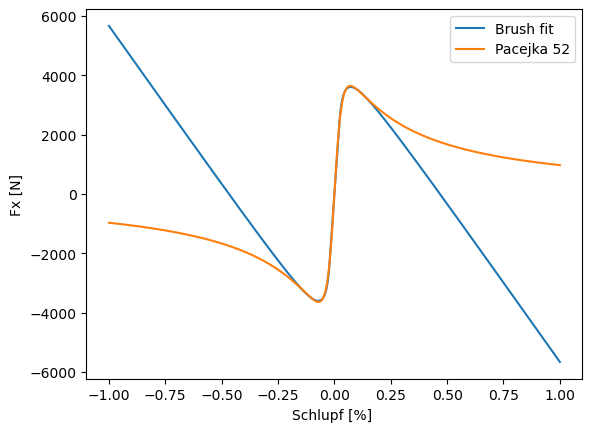

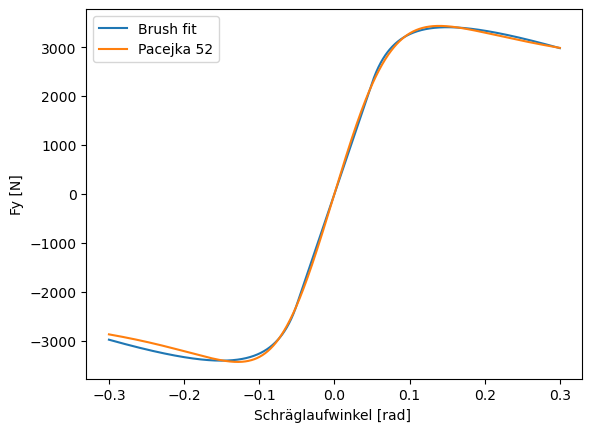

In [7]:
##Darstellung fitting


print(Fx_br_params)
print(Fy_br_params)

Sxx = np.linspace(-1,1,1000)
Fxx = br.brush_long(Sxx,Fz, *Fx_br_params)
Fxx_pa = pa52_0.Pacejka52_long(Fz,Sxx,IA,Fz0)[0]

plt.figure(1)
plt.plot(Sxx,Fxx, label ="Brush fit")
plt.plot(Sxx,Fxx_pa, label = "Pacejka 52")
plt.legend()
plt.xlabel("Schlupf [%] ")
plt.ylabel("Fx [N]")

Syy = np.linspace(-0.3,0.3,1000)
Fyy = br.brush_long(Syy,Fz, *Fy_br_params)
Fyy_pa = pa52_0.Pacejka52_lat(Fz,Syy,IA,Fz0)[0]

plt.figure(2)
plt.plot(Syy,Fyy, label ="Brush fit")
plt.plot(Syy,Fyy_pa, label = "Pacejka 52")
plt.legend()
plt.xlabel("Schräglaufwinkel [rad] ")
plt.ylabel("Fy [N]")
